# **EVALUACION 2 MINERIA DE DATOS 2024 (BIY7121_004V) - TEMPERATURA**

Alumno: **Cristóbal Cabezas Espinoza**

In [3]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

## **1. BUSSINESS UNDERSTANDING**

### 1.1. **Contexto** 


Se nos ha entregado un dataset correspondiente a...

### 1.2. **Definición de columnas**

In [4]:
# Cargamos el dataset
temperature_df = pd.read_csv("temperatura.csv", delimiter=',')

## **2. DATA UNDERSTANDING**

### **2.1. EDA**

In [5]:
# Numero total de filas y columnas, respectivamente
print('N° filas: ', temperature_df.shape[0])
print('N° columnas: ', temperature_df.shape[1])

N° filas:  142193
N° columnas:  24


In [6]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
# Mostramos los primeros 5 registros
temperature_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [8]:
# Los ultimos 5 registros
temperature_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [9]:
# Resumen estadístico de nuestras columnas
temperature_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### 2.2. **Algunos gráficos**

/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

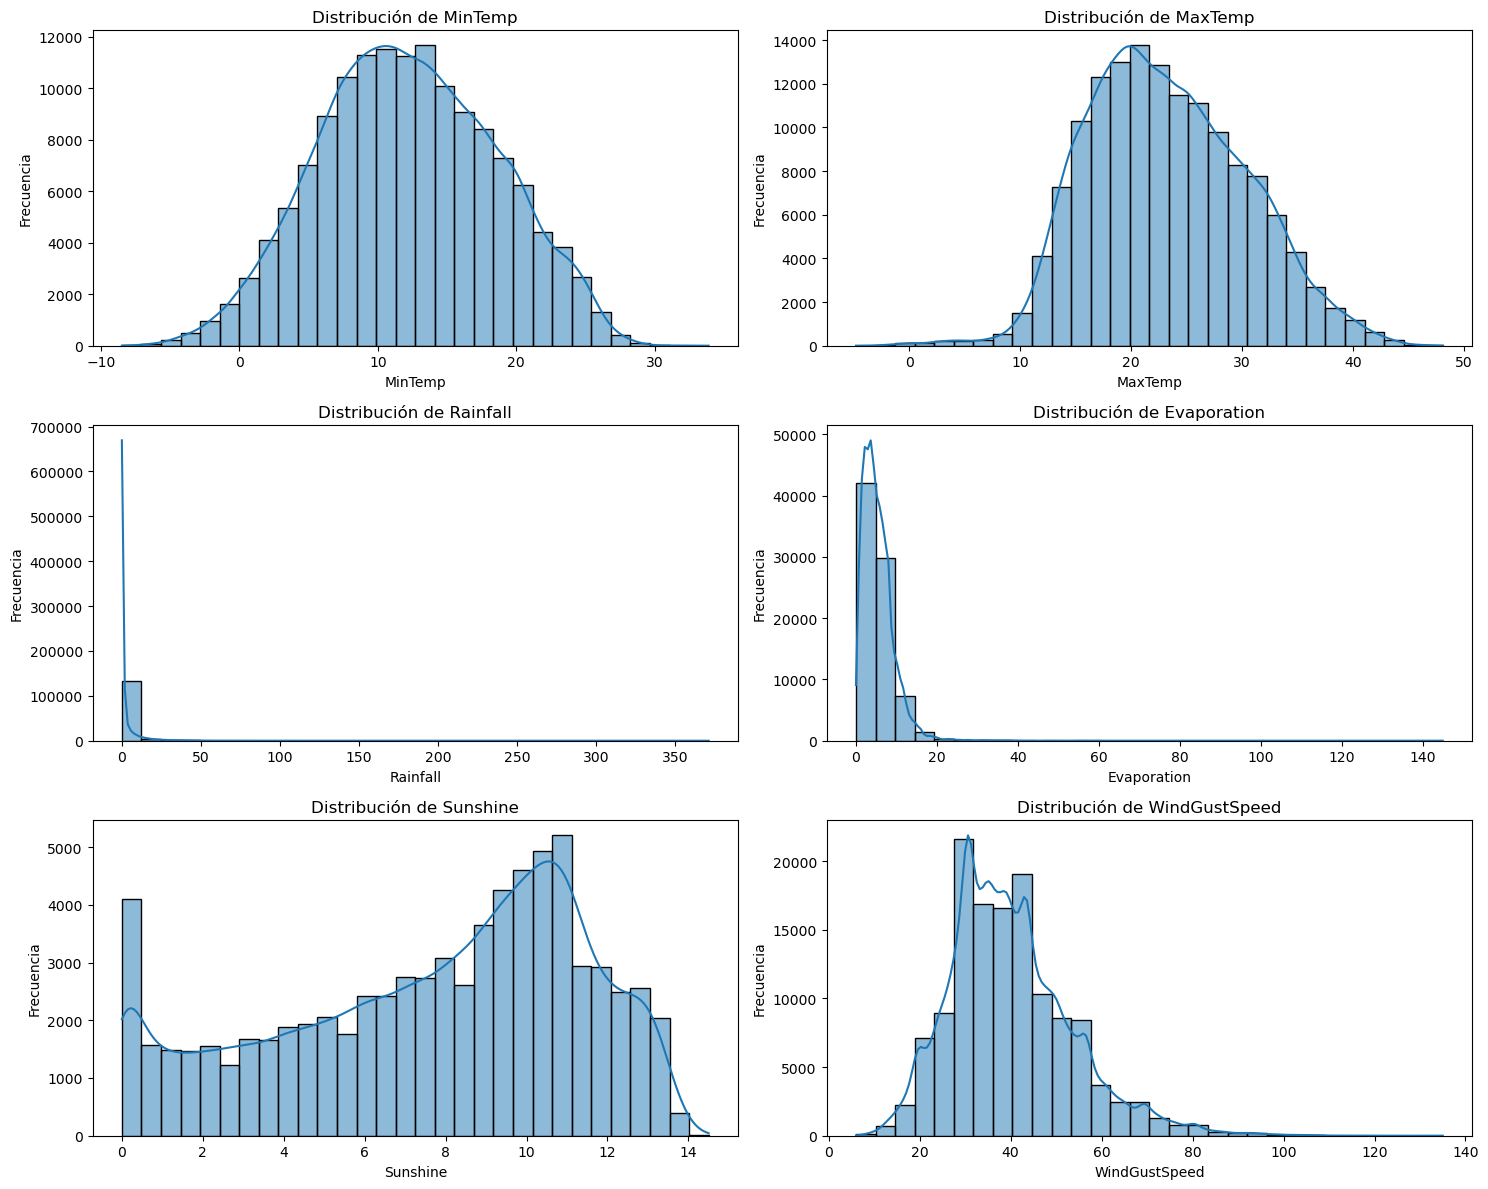

In [14]:
# Seleccionando solo columnas numéricas para los gráficos de distribución
num_cols = temperature_df.select_dtypes(include=['float64']).columns

# Configurando el tamaño de la figura para los gráficos
plt.figure(figsize=(15, 12))

# Generando gráficos de distribución (histogramas) para las primeras 6 características numéricas
for i, col in enumerate(num_cols[:6]):
    plt.subplot(3, 2, i+1)
    sns.histplot(temperature_df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

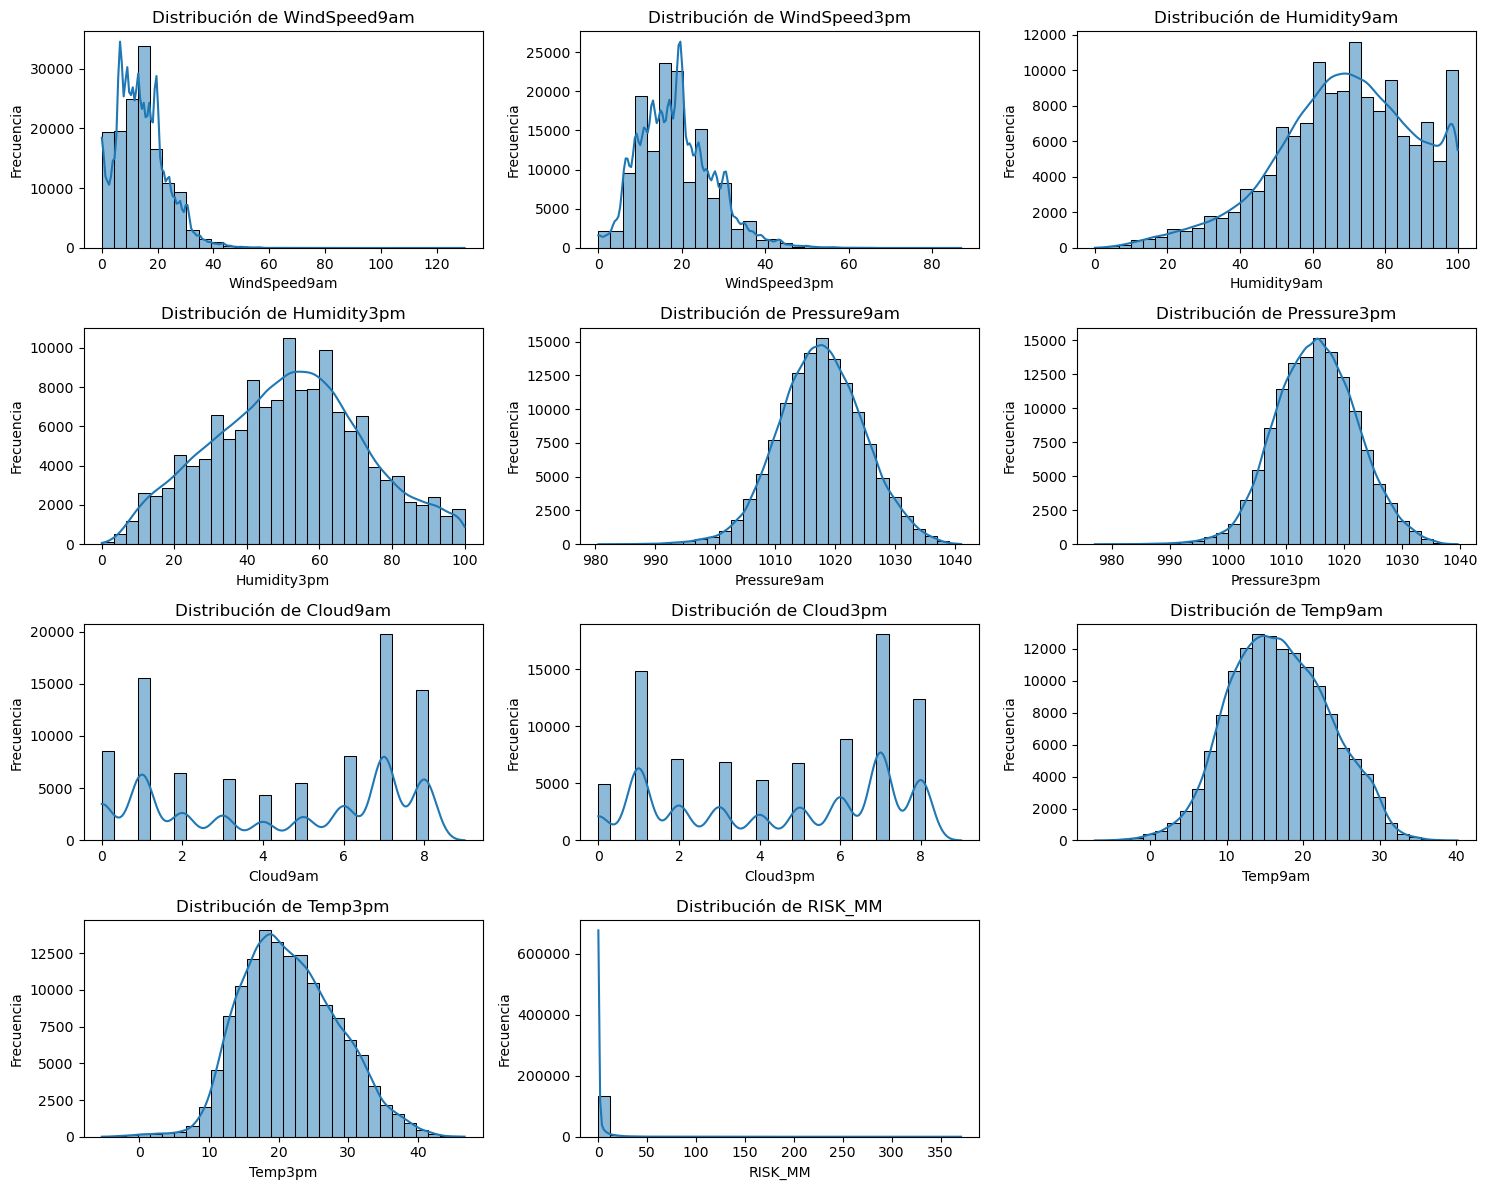

In [12]:
# Configurando el tamaño de la figura para los gráficos
plt.figure(figsize=(15, 12))

# Número de columnas a graficar
num_columns = len(num_cols[6:])

# Calculando el número de filas necesarias para el layout (ajustar según sea necesario)
n_rows = (num_columns + 2) // 3

# Generando gráficos para las características numéricas restantes
for i, col in enumerate(num_cols[6:]):
    plt.subplot(n_rows, 3, i+1)  # Ajustando el layout para acomodar las gráficas
    sns.histplot(temperature_df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


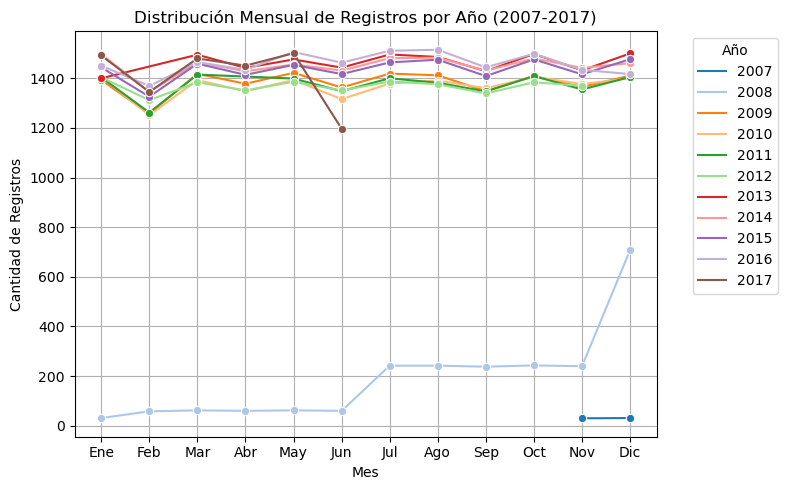

In [15]:
# Convirtiendo la columna 'Date' a un tipo de datos de fecha
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])
# Creando nuevas columnas 'DateYear' y 'DateMonth'
temperature_df['DateYear'] = temperature_df['Date'].dt.year
temperature_df['DateMonth'] = temperature_df['Date'].dt.month
# Agrupando los datos por 'DateYear' y 'DateMonth'
grouped_df = temperature_df.groupby(['DateYear', 'DateMonth']).size().reset_index(name='Counts')
# Nombres de los meses para las etiquetas del eje X
month_names = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
# Creando el gráfico
plt.figure(figsize=(8, 5))
lineplot = sns.lineplot(data=grouped_df, x='DateMonth', y='Counts', hue='DateYear', palette='tab20', marker='o')
# Configurando el gráfico
plt.title('Distribución Mensual de Registros por Año (2007-2017)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.xticks(ticks=range(1, 13), labels=month_names)  # Etiquetas de meses
# Ajustando la leyenda para incluir todos los años
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_29570/3568431590.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(column_counts.index, rotation=90)


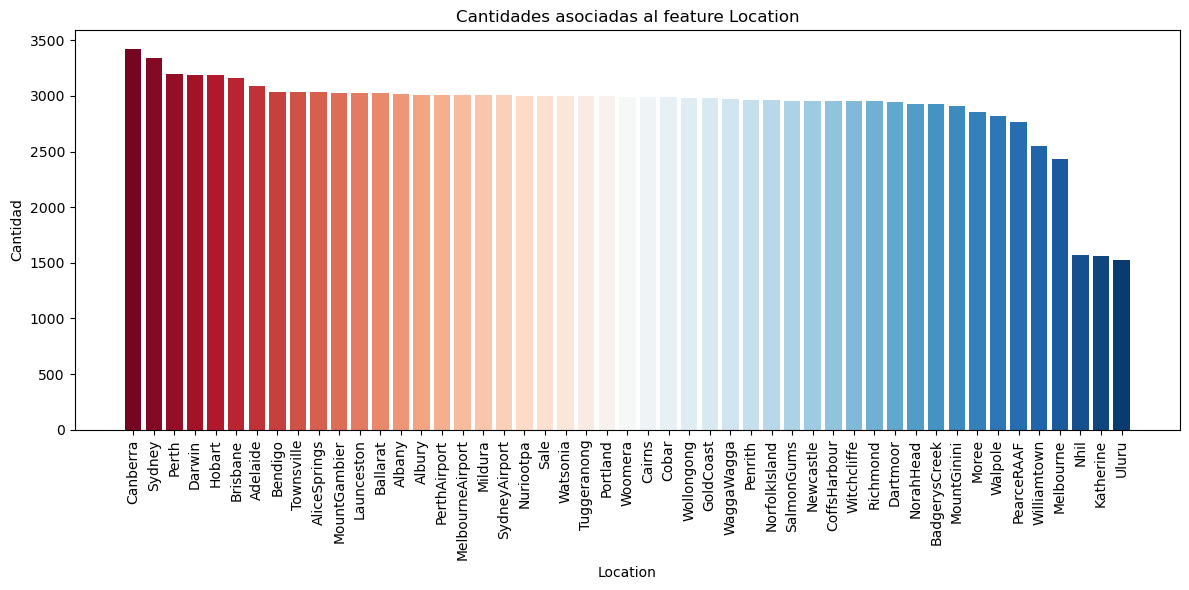

In [16]:
# Contar los valores de la columna
column_counts = temperature_df["Location"].value_counts()
# Crear una paleta de colores personalizada basada en la cantidad de valores
color_palette = sns.color_palette("RdBu", len(column_counts))
# Crear una figura y un subplot con el tamaño personalizado
fig, axs = plt.subplots(figsize=(12, 6))
# Gráfico de barras para la columna con colores personalizados
axs.bar(column_counts.index, column_counts.values, color=color_palette)
# Configurar las etiquetas del eje x con rotación opcional
axs.set_xticklabels(column_counts.index, rotation=90)
axs.set_title(f'Cantidades asociadas al feature {"Location"}')
axs.set_xlabel("Location")
axs.set_ylabel('Cantidad')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

/home/cristobal/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


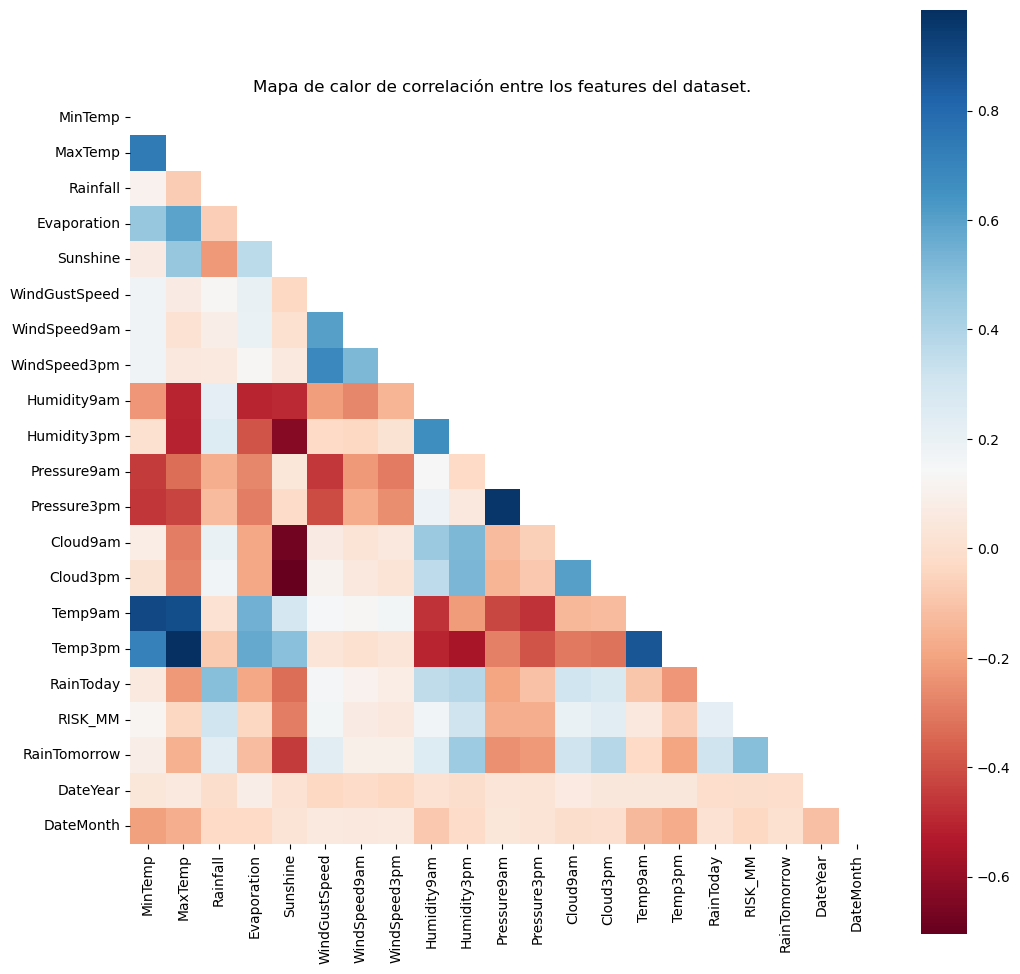

In [17]:
# Transformando las variables 'RainToday' y 'RainTomorrow' de 'No' = 0 y 'Yes' = 1
temperature_df['RainToday'] = temperature_df['RainToday'].map({'No': 0, 'Yes': 1})
temperature_df['RainTomorrow'] = temperature_df['RainTomorrow'].map({'No': 0, 'Yes': 1})
# Seleccionando solo las columnas numéricas del DataFrame copiado
dfco = temperature_df.select_dtypes(include='number')
# Calculando la matriz de correlación
corr = dfco.corr()
# Creando una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configurando el tamaño de la figura
plt.figure(figsize=(12, 12))
# Dibujando el mapa de calor con la máscara
sns.heatmap(corr, mask=mask, annot=True, cmap="RdBu", square=True)
plt.title("Mapa de calor de correlación entre los features del dataset.")
# Mostrando la figura
plt.show()

## 3. **DATA PREPARATION**

### 3.1. **Limpieza y transformación**

#### 3.1.1. **Tratamiento de valores nulos**

In [ ]:
temperature_df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

#### 3.1.2 **Tratamiento de outliers**

In [ ]:
# Continuar aqui

### 3.2. **Análisis y procesamiento**

#### 3.2.1. **Encoding**

In [ ]:
# Continuar aqui

#### 3.2.2. **Escalamiento**

In [ ]:
# Continuar aqui

#### 3.2.3. **Correlación**

In [ ]:
# Continuar aqui